Logistic Regression Accuracy: 0.9941588785046729
Random Forest Accuracy: 0.9964953271028038

Classification Report (Random Forest):

                precision    recall  f1-score   support

       Applied       1.00      1.00      1.00        21
   Dropped Out       1.00      1.00      1.00       123
      Rejected       1.00      1.00      1.00       714
 Rewards Award       0.83      0.83      0.83         6
       Started       0.97      1.00      0.99       154
Team Allocated       1.00      1.00      1.00       655
    Waitlisted       1.00      1.00      1.00        22
      Withdraw       0.92      0.71      0.80        17

      accuracy                           1.00      1712
     macro avg       0.97      0.94      0.95      1712
  weighted avg       1.00      1.00      1.00      1712



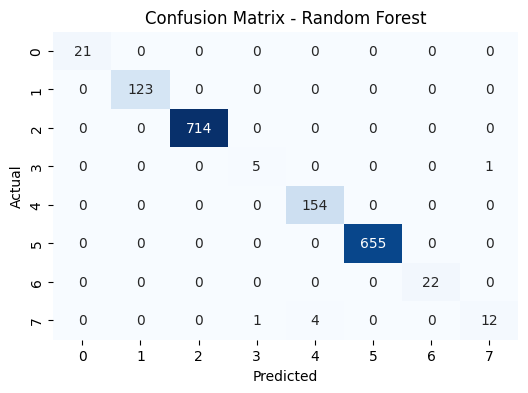

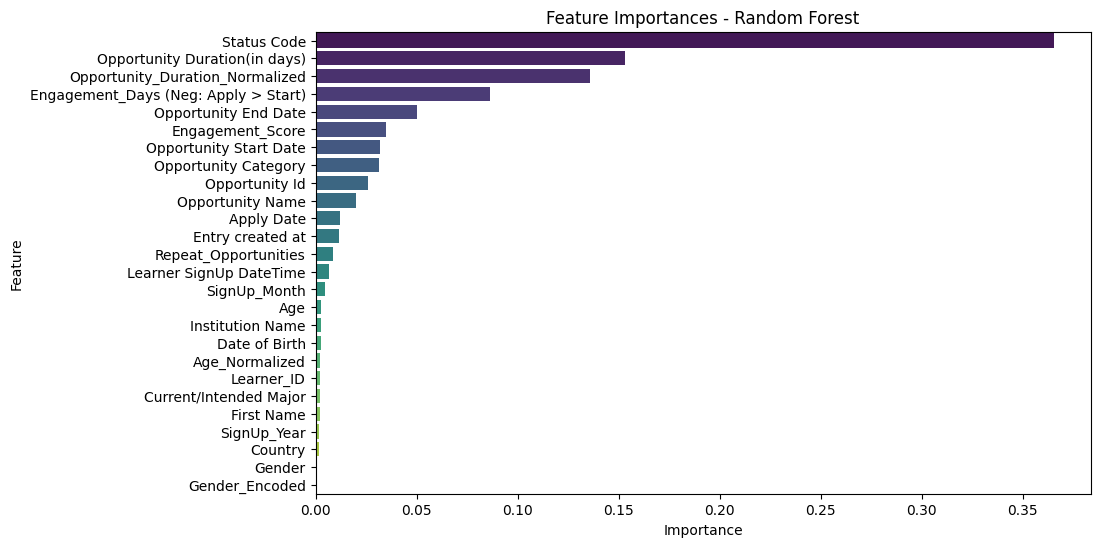

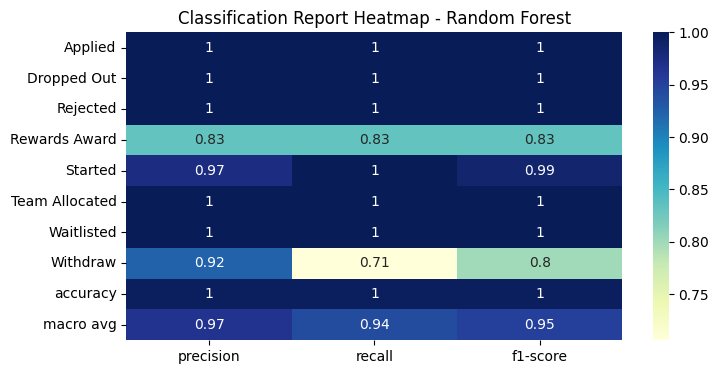

In [1]:
# -------------------------------------------
# 📚 Import Libraries
# -------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# -------------------------------------------
# 📦 1. Load Dataset
# -------------------------------------------
df = pd.read_excel('Cleaned_Opportunity_Data_With_Record_ID.xlsx')

# -------------------------------------------
# 🎯 2. Define Target Variable
# -------------------------------------------
if 'Status Description' in df.columns:
    y = df['Status Description']
else:
    raise KeyError("Column 'Status Description' not found in dataset.")

# -------------------------------------------
# ✂️ 3. Drop ID and Target Columns
# -------------------------------------------
drop_columns = [col for col in ['record_id', 'Status Description'] if col in df.columns]
X = df.drop(columns=drop_columns, axis=1)

# -------------------------------------------
# 🔤 4. Encode Categorical Variables
# -------------------------------------------
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# -------------------------------------------
# 🛠️ 5. Handle Missing Values
# -------------------------------------------
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# -------------------------------------------
# 📏 6. Scale the Features
# -------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -------------------------------------------
# ✂️ 7. Train-Test Split
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------------------
# 🧠 8. Train Models
# -------------------------------------------

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
lr_model.fit(X_train, y_train)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# -------------------------------------------
# 🧪 9. Evaluate Models
# -------------------------------------------

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Accuracy Scores
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Detailed Random Forest Report
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))

# -------------------------------------------
# 🎨 10. Visuals Section
# -------------------------------------------

# 1. Confusion Matrix - Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Feature Importance Plot - Random Forest
feature_importances = rf_model.feature_importances_
features = df.drop(columns=drop_columns).columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances - Random Forest')
plt.show()

# 3. Classification Report Heatmap
report = classification_report(y_test, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title('Classification Report Heatmap - Random Forest')
plt.show()

# -------------------------------------------
# ✅ END
# -------------------------------------------
